# Canadian Armed Forces Operations

## Setup and Load Data

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.express as px

%matplotlib inline


In [12]:
data = pd.read_csv('operations-data.csv')

In [13]:
#display the headers 
data.dtypes

Operation (OP) Name                  object
Nom de l'op�ration (OP)              object
International Operation Name         object
Nom de l'op�ration internationale    object
Description                          object
Description.1                        object
Location                             object
Emplacement                          object
Start Date/date de d�but             object
End Date/date de fin                 object
dtype: object

## Data clean up

In [14]:
#create a new variable that only displays colums with english headers
data_english = data[['Operation (OP) Name', 'Description', 'Location', 'Start Date/date de d�but', 'End Date/date de fin' ]]

#change the name of the headers
data_english.rename(columns={'Start Date/date de d�but':'Start Date',
                          'End Date/date de fin':'End Date'}, 
                 inplace=True)


In [15]:
#Display the amended headers with the top 5 rows of data
data_english.head()

,Operation (OP) Name,Description,Location,Start Date,End Date
0,OP ARGONAUT,Disaster Response - Accommodation Assistance f...,CANADA,15/01/2004,12/02/2004
1,OP OPEN VIEW,Observation - Chemical Weapons Convention (CWC...,ACCROSS EUROPE AND NORTH AMERICA,29/04/1997,Ongoing/En Cours
2,OP AUGURAL,Military contribution to the African Union Mis...,"ADDIS ABABA, ETHIOPIA",01/09/2004,15/12/2007
3,OP ACCIUS,"Military Advisor to UNAMA, Afghanistan",AFGHANISTAN,28/03/2002,30/06/2005
4,OP ADDENDA,Security - Embassy in Afghanistan,AFGHANISTAN,01/04/2014,Ongoing/En Cours


## Data grouping and visualization

In [16]:
#isolate the locations that's [End Date] is Ongoing, rename the headers and give it the value of df3
df3 = data_english[data_english['End Date'] == 'Ongoing/En Cours']['Location'].value_counts().rename_axis('Country').reset_index(name='Active_Ops')
#df3 = df2.head(30)

#appoint each country with a country code iso that will be used to plot the map.
country_codes = [['CANADA', 'CAN'],
                 ['AFGHANISTAN', 'AFG'],
                 ['EUROPE', 'BEL'],
                 ['WESTERN SAHARA', 'ESH'],
                 ['CANADA AND THE WORLD', 'ATA'],
                 ['SUDAN', 'SDN'],
                 ['ACCROSS EUROPE AND NORTH AMERICA', 'CCC'],
                 ['NORTH AMERICA', 'USA'],
                 ['EGYPT', 'EGY'],
                 ['CENTRAL AND EASTERN EUROPE', 'UKR'],
                 ['NETHERLANDS', 'NDL'],
                 ['WEST AFRICA', 'MLI'],
                 ['IRAQ', 'IRQ'],
                 ['LEBANON', 'LBN'],
                 ['KOREA', 'KOR']]

code_map=pd.DataFrame(country_codes, columns = ['Country', 'country_code'])

df5=pd.merge(df3, code_map, how='left', on='Country')

#df3.insert(2, 'country_code', (country_codes),True )

fig = px.choropleth(df5, locations='country_code',
                    color="Active_Ops", # 
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

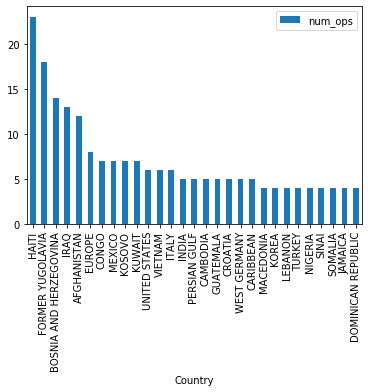

In [17]:
#isolate the countries that canada has deployed its army to the most and display the result on a bar chart.

#take the value count of header [Location] and give it a value of df2
df2 = data_english['Location'].value_counts().rename_axis('Country').reset_index(name='num_ops')
df2 = df2.head(30)
df2 = df2[df2.Country !='CANADA']
#df2
df2.plot(kind ='bar',x='Country',y= 'num_ops')

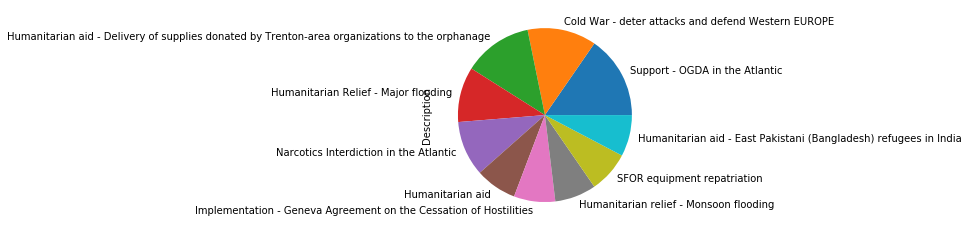

In [19]:
# isolate the types of operations that are the most common and display top 10 in pie chart.
df6 = data_english['Description'].value_counts()
df6 = df6.head(10)
df6.plot(kind ='pie',x = 'num-ops', y = 'Description')

In [20]:
#isolate the names of the current operations, rename the headers and give it the value of df4
df4 = data_english[data_english['End Date'] == 'Ongoing/En Cours']['Operation (OP) Name'].value_counts().rename_axis('Operation').reset_index(name='num_mission')
df4

,Operation,num_mission
0,UN COMMAND MILITARY ARMISTICE COMMISSION (UNCMAC),1
1,OP NANOOK,1
2,OP DRIFTNET,1
3,OP BARKHANE,1
4,OP TANGO,1
5,OP SUDAN,1
6,OP REASSURANCE,1
7,OP NUNALIVUT,1
8,OP ANGORA,1
9,OP OPEN VIEW,1


In [24]:
#df6 = data_english['Description'].value_counts()
#df6 = df6.tail(20)

In [10]:
#display each op within the country searched
#data[data['Location'] == 'IRAQ']['Operation (OP) Name'].value_counts()
#data[data['Location'] == 'MEXICO']['Operation (OP) Name'].value_counts()
#data[data['Location'] == 'EUROPE']['Operation (OP) Name'].value_counts()

In [54]:
#data_english[data_english['Location'] =='CANADA']['End Date'].value_counts().plot(kind="line")

In [24]:
#data_english['End Date'].value_counts().head(30).plot(kind="line")

In [25]:
#data_english['End Date'].value_counts().head(30).plot(kind="line")